In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<font color='red'><big>Import Data!</big></font>

In [2]:
sales = pd.read_csv(
    'sales_data.csv',
    parse_dates=['Date'])

**Data Overview**

In [3]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [4]:
sales.shape

(113036, 18)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [7]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


**Numerical Analysis and Visualization**

In [11]:
sales["Unit_Cost"].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [13]:
sales["Unit_Cost"].mean()

267.296365759581

In [15]:
sales["Unit_Cost"].median()

9.0

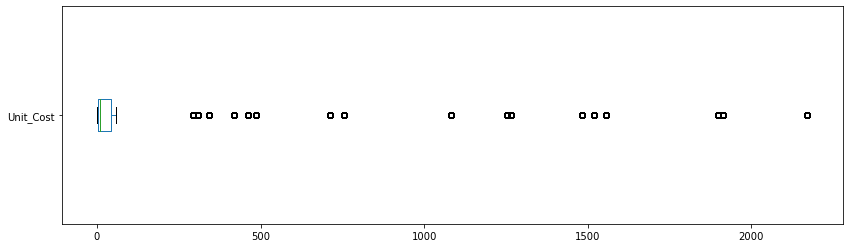

In [19]:
sales["Unit_Cost"].plot(kind="box", vert=False, figsize=(14,4))

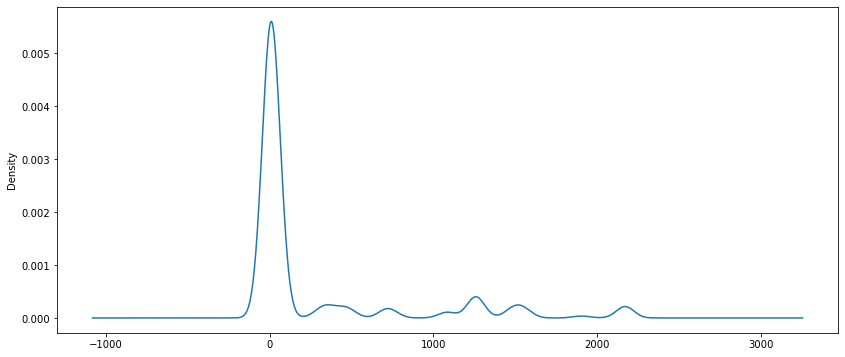

In [22]:
sales["Unit_Cost"].plot(kind="density", figsize=(14,6))

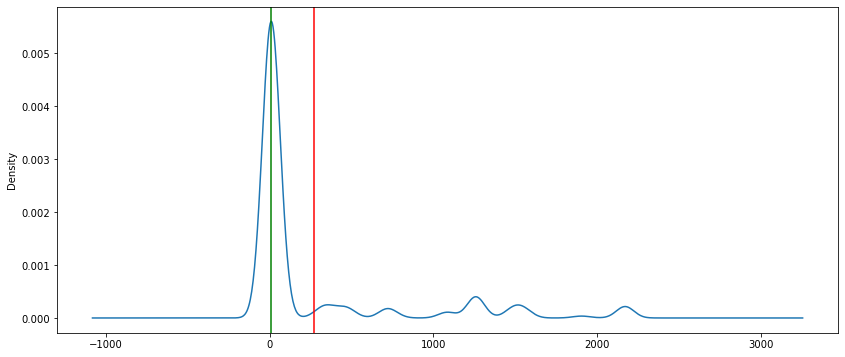

In [24]:
ax = sales["Unit_Cost"].plot(kind="density", figsize=(14,6))
ax.axvline(sales['Unit_Cost'].mean(), color="red")
ax.axvline(sales["Unit_Cost"].median(), color="green")

Text(0.5, 0, 'dollars')

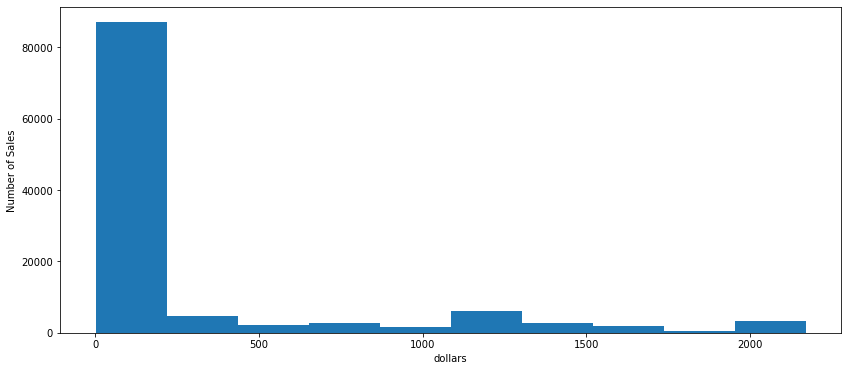

In [26]:
ax = sales['Unit_Cost'].plot(kind="hist", figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('dollars')

**Categorical Analysis and Visualizaton**

Analyze `Age_Group` column

In [28]:
sales["Age_Group"].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

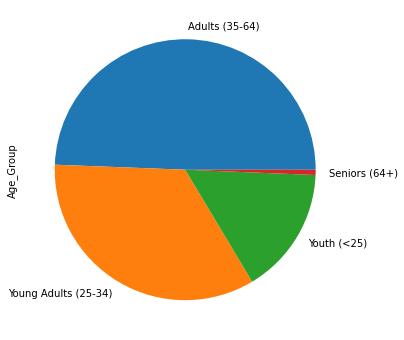

In [29]:
sales["Age_Group"].value_counts().plot(kind="pie", figsize=(6,6))

Text(0, 0.5, 'Number of Sales')

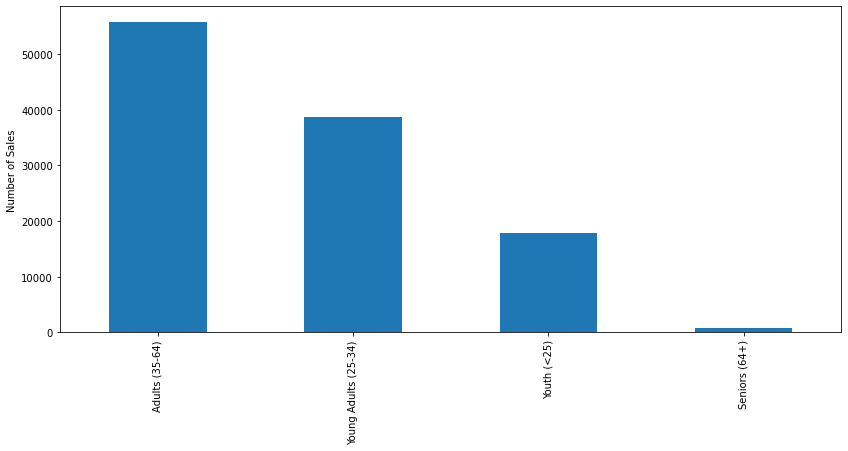

In [31]:
ax = sales["Age_Group"].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

**Relationship between the columns**

In [35]:
corr = sales.corr()
corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


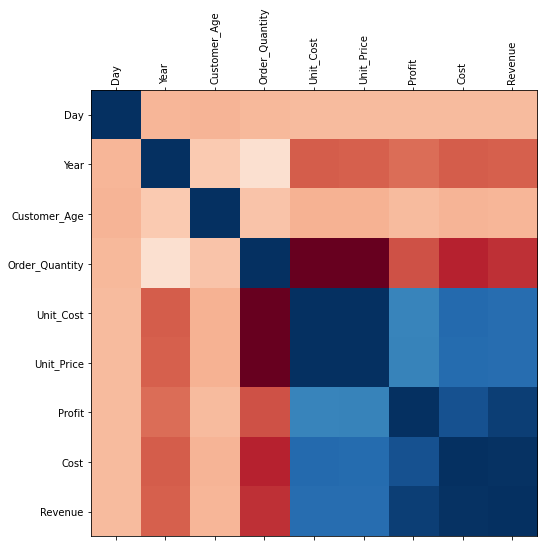

In [39]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

# red is high corelation
# white is low corelation
# blue is corelation 1

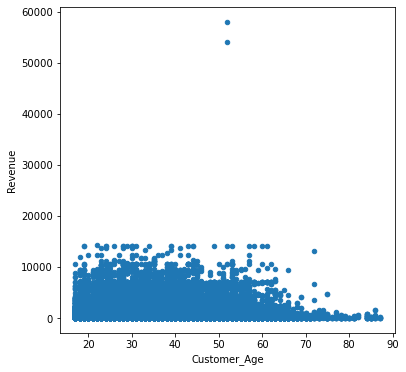

In [42]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

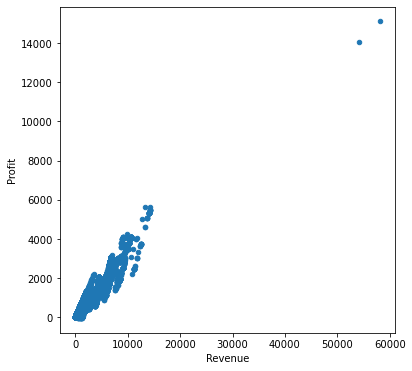

In [44]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

Text(0, 0.5, 'Profit')

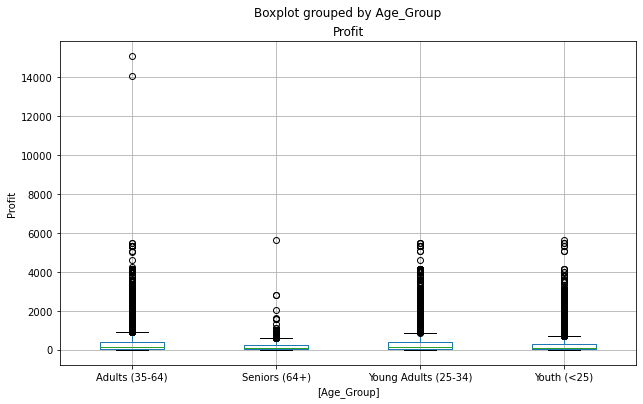

In [46]:
ax=sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

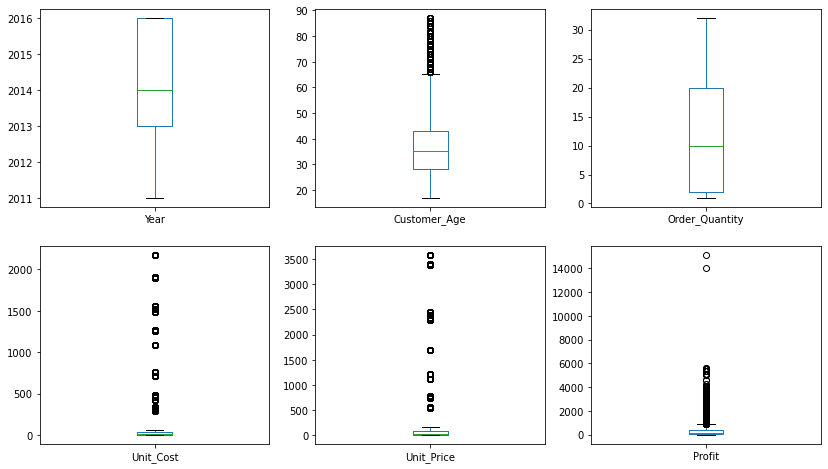

In [47]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

**Column Wrangling**
We can also create new columns or modify existing ones

**Add an calculate a new `Revenue_per_Age`column**

In [49]:
sales["Revenue_per_Age"] = sales["Revenue"] / sales["Customer_Age"]

sales["Revenue_per_Age"].head()

0    50.000000
1    50.000000
2    49.000000
3    42.612245
4     8.893617
Name: Revenue_per_Age, dtype: float64

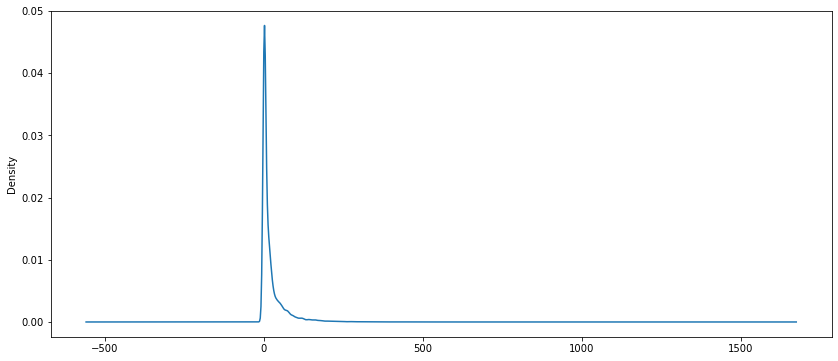

In [50]:
sales["Revenue_per_Age"].plot(kind='density', figsize=(14,6))

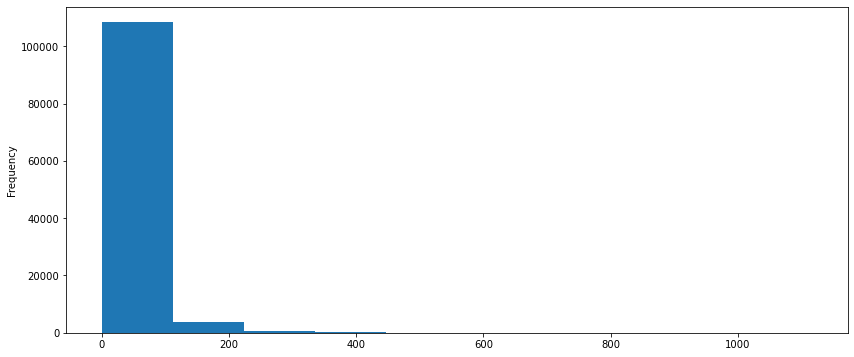

In [52]:
sales["Revenue_per_Age"].plot(kind='hist', figsize=(14,6))

In [53]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,50.000000
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,49.000000
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,42.612245
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,8.893617


**Add an calculate a new <code> Calculated_Cost </code>**

Yearly calculating. "Calculated_Cost = Order_Quantity*Unit_Cost"

In [57]:
sales['Calculated_Cost'] = sales['Order_Quantity'] * sales['Unit_Cost']

sales['Calculated_Cost'].head()

113031     72
113032    528
113033    528
113034    576
113035    552
Name: Calculated_Cost, dtype: int64

In [58]:
(sales['Calculated_Cost'] != sales['Cost']).sum()

0

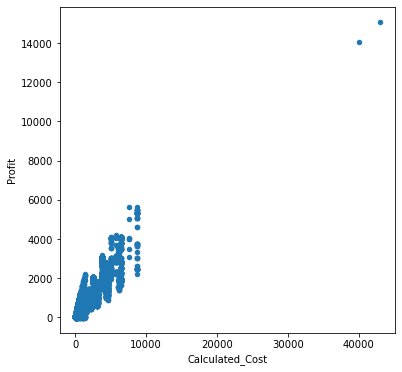

In [56]:
sales.plot(kind='scatter', x='Calculated_Cost', y='Profit', figsize=(6,6))

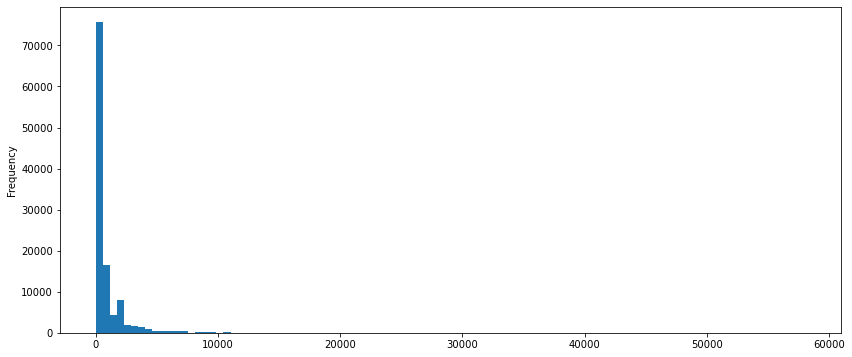

In [60]:
sales['Revenue'].plot(kind='hist', bins=100, figsize=(14,6))

**Modift all <code>Unit_Price</code> values adding %3 tax to them**

In [62]:
sales['Unit_Price'].head()

0    120
1    120
2    120
3    120
4    120
Name: Unit_Price, dtype: int64

In [66]:
sales['Unit_Price'] *= 1.03

In [68]:
sales['Unit_Price'].head()

0    127.308
1    127.308
2    127.308
3    127.308
4    127.308
Name: Unit_Price, dtype: float64

**Selection & Indexing**

***Get all the sales made in the state of <code>Kentucky</code>***

In [69]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_per_Age,Calculated_Cost
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,127.3080,63,45,108,2.700,45
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,127.3080,63,45,108,2.700,45
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,23.3398,142,96,238,5.950,96
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,23.3398,165,112,277,6.925,112
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,37.1315,537,377,914,22.850,377
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,37.1315,574,403,977,24.425,403
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,31.8270,32,22,54,1.350,22
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,31.8270,336,231,567,14.175,231
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,31.8270,16,11,27,0.675,11
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,31.8270,288,198,486,12.150,198


**Get the mean revenue of the <code>Adults (35-64)</code> sales group**

In [70]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean

<bound method Series.mean of 2         2401
3         2088
4          418
5          522
6          379
          ... 
113029     123
113030     369
113031     184
113034    1260
113035    1207
Name: Revenue, Length: 55824, dtype: int64>

**How many records belon to Age Group  <code>Youth (35-64) or Adults (35-64)</code> ?**

In [71]:
sales.loc[(sales['Age_Group']=='Youth (<25)') | (sales['Age_Group']== 'Adults (35-64)')].shape[0]

73652

**Get the mean revenue of the sales group <code>Adults (35-64)</code> sales group**

In [ ]:
sales.loc[(sales['Age_Group']=='Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

**Increase the revenue by %10 to every sale made in France

In [74]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [ ]:
sales.loc[sales['Country'] == 'France', 'REvenue']*